In [38]:
from sklearn import datasets
import numpy as np

In [39]:
#Irisデータセットをダウンロード
iris = datasets.load_iris()
#3,4列目の特徴量を抽出
X = iris.data[:,[2,3]]
y = iris.target

In [40]:
print("Class labels:",np.unique(y))

Class labels: [0 1 2]


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
#全体の30%をテストデータにする
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3 , random_state=1,stratify=y)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()
#トレーニングデータの平均と標準誤差を計算
sc.fit(X_train)
#平均と標準誤差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [45]:
from sklearn.linear_model import Perceptron

In [46]:
ppn = Perceptron(n_iter=40,eta0=0.1,random_state=1)
#トレーニングデータをモデルに適合させる
ppn.fit(X_train_std,y_train)

/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
#テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
#誤分類のサンプルの個数を表示　
print("Misclassified samples:%d"%(y_test!=y_pred).sum())

Misclassified samples:9


In [48]:
from sklearn.metrics import accuracy_score
#分類の正解率を表示
print("Accuracy:%.2f"%accuracy_score(y_test,y_pred))

Accuracy:0.80


In [49]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [50]:
def plot_dicision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    #マーカーとカラーマップの準備
    markers =("s","x","o","^","v")
    colors = ("red","blue","lightgreen","gray","cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #決定領域のプロット
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max()+1
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    #各特徴量を１次元配列に変換して予測を実行 
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx],label=cl)
    
    #テストサンプルを目立たせる（点を◯で表示）
    if test_idx:
        x_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(*args, **kw)>

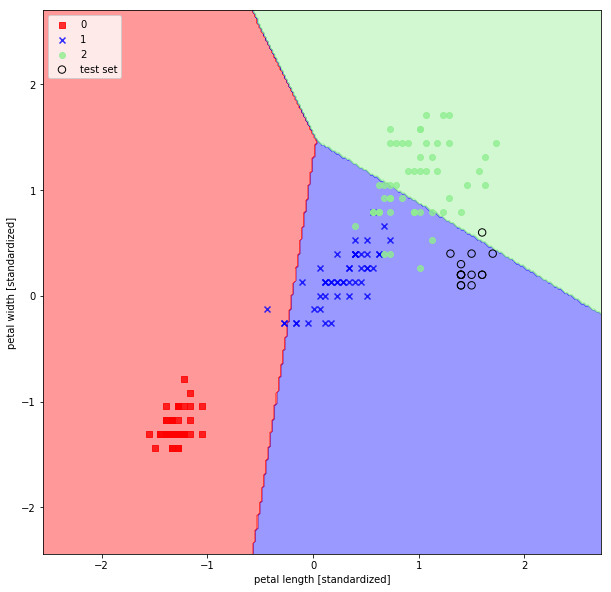

In [51]:
#トレーニングレータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))

plt.figure(figsize=(10,10))

#決定境界のプロット
plot_dicision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
#軸のラベルの設定
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
#凡例の設置
plt.legend(loc="upper left")

plt.show

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


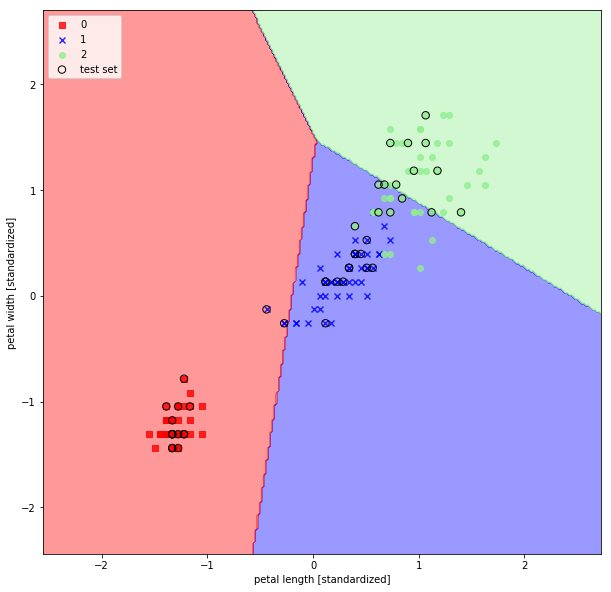

In [52]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(10,10))


plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

# plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

In [16]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

<function matplotlib.pyplot.show(*args, **kw)>

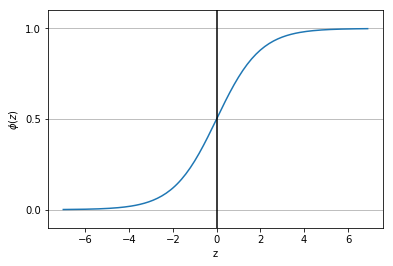

In [17]:
#0.1間隔で−７以上７未満のデータを生成
z = np.arange(-7,7,0.1)
#生成したデータでシグモイド関数を実施
phi_z = sigmoid(z)
#元のデータとシグモイド関数の出力をプロット
plt.plot(z,phi_z)
#垂直線を追加(z=0)
plt.axvline(0.0,color='k')
#y軸の上限、下限を設定
plt.ylim(-0.1,1.1)
#軸のラベルを設定
plt.xlabel("z")
plt.ylabel("$\phi (z)$")
#y軸のメモリを追加
plt.yticks([0.0,0.5,1.0])
#Axesクラスのオブジェクトの取得
ax = plt.gca()
#y軸のメモリに合わせて水平グリッド線を追加
ax.yaxis.grid(True)

plt.show

/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all poi

<function matplotlib.pyplot.show(*args, **kw)>

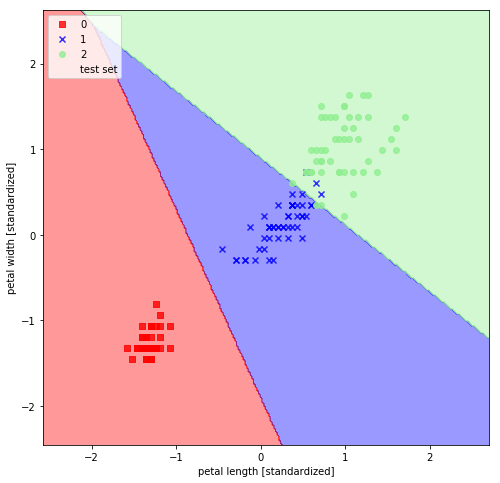

In [18]:
from sklearn.linear_model import LogisticRegression
#ロジスティック回帰のインスタンスを作成
lr = LogisticRegression(C=1000.0,random_state=0)
#トレーニングデータをモデルに適合させる
lr.fit(X_train_std,y_train)
plt.figure(figsize=(8,8))
#決定境界をプロット
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))

#軸のラベルの設定
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
#凡例の設置
plt.legend(loc="upper left")

plt.show

２つの重み係数と逆正則化パラメータの関係

/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

<function matplotlib.pyplot.show(*args, **kw)>

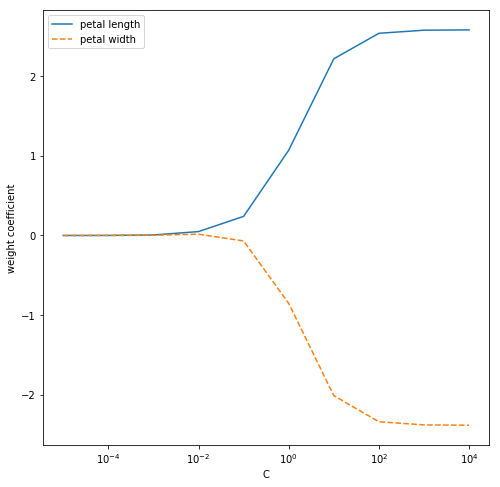

In [19]:
#重み係数と逆正則化パラメータcの空リストを生成
weights,params=[],[]
#１０個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5.0,5.0):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std,y_train)
    #重み係数を格納
    weights.append(lr.coef_[1])
    #逆正則化パラメータ
    params.append(10**c)
    
#重み係数をNumpy配列に変換
weights = np.array(weights)
plt.figure(figsize=(8,8))
#横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params,weights[:,0],label="petal length")
plt.plot(params,weights[:,1],linestyle="--",label="petal width")
plt.ylabel("weight coefficient")
plt.xlabel("C")
plt.legend(loc="upper left")
#横軸を対数スケールに設定
plt.xscale("log")

plt.show

In [20]:
from sklearn.svm import SVC


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(*args, **kw)>

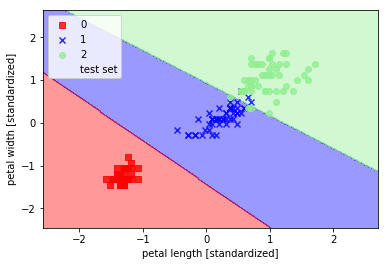

In [23]:
#線形SVMのインスタンスを作成
svm = SVC(kernel="linear",C=1.0,random_state=0)
#線形SVMのモデルにトレーニングを適合させる
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
#軸のラベルの設定
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
#凡例の設置
plt.legend(loc="upper left")

plt.show

In [35]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 9


/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [33]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

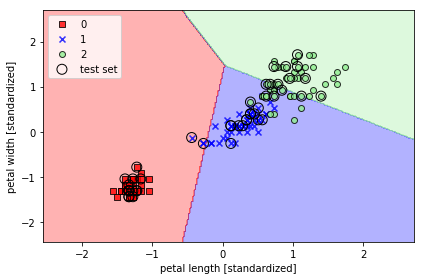

In [34]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

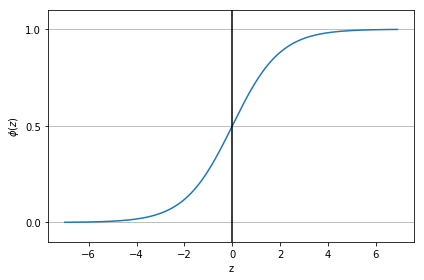

In [53]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

In [54]:
from sklearn.linear_model import SGDClassifier 

In [55]:
#確率的勾配降下法バージョンのパーセプロトロンを生成
ppn = SGDClassifier(loss="perceptron")
#確率的勾配降下法バージョンのロジスティック回帰を生成
lr = SGDClassifier(loss="log")
#確率的勾配降下法バージョンのSVM（損失関数はヒンジ関数）を生成
svm = SGDClassifier(loss="hinge")

３．５　カーネルSVMを使った非線形問題の求解

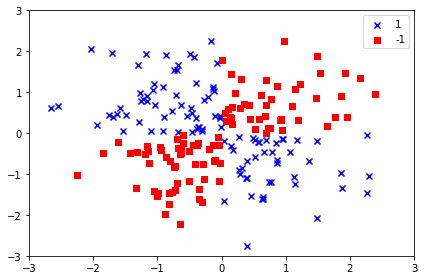

In [58]:
np.random.seed(0)
#標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200,2)
#2つの引数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
#排他的論理和の値が真の時は１、偽のときは−１を割り当てる　
y_xor = np.where(y_xor,1,-1)
#ラベル１を青のxでプロット
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c="b",marker="x",label="1")
#ラベル−１を赤の四角でプロット
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c="r",marker="s",label="-1")
#軸の範囲を設定
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc="best")
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


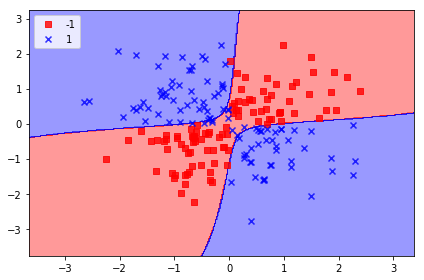

In [62]:
#RBFカーネルによるSVMのインスタンスを作成
svm = SVC(kernel="rbf",random_state=1,gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


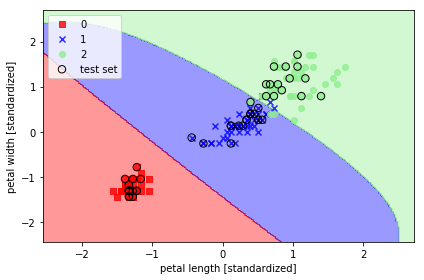

In [63]:
#RBFカーネルによるSVMインスタンスの作成(2つのパラメータを変更)
svm = SVC(kernel="rbf",random_state=1,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


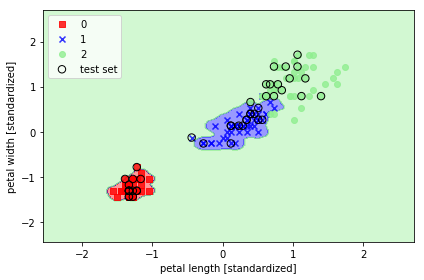

In [64]:
#RBFカーネルによるSVMインスタンスの作成(gamma=100のとき )
svm = SVC(kernel="rbf",random_state=1,gamma=100.0,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

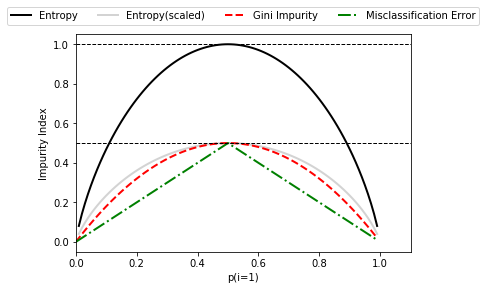

In [72]:
#ジニ不純度の関数を定義
def gini(p):
    return (p)*(1-p)+(1-p)*(1-(1-p))
#エントロピーの関数を定義
def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2(1-p)
#分類誤差の関数を定義
def error(p):
    return 1-np.max([p,1-p])

#確率を表す配列を生成
x = np.arange(0.0,1.0,0.01)
#配列の値をもとにエントロピー、分類誤差を計算
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
#図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)

#エントロピー２種、ジニ不純度、分類誤差のそれぞれをループ処理
for i ,lab,ls,c,in zip([ent,sc_ent,gini(x),err],
                      ["Entropy","Entropy(scaled)","Gini Impurity","Misclassification Error"],
                      ["-","-","--","-."],
                      ["black","lightgray","red","green","cyan"]):
    line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)

#凡例の設置
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),ncol=5,fancybox=True,shadow=False)
#２本の水平の破線を引く
ax.axhline(y=0.5 , linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0 , linewidth=1,color='k',linestyle='--')
#横軸の上限、下限を設定
plt.xlim([0,1.1])
plt.xlabel("p(i=1)")
plt.ylabel("Impurity Index")
plt.show()

In [76]:
from sklearn.tree import DecisionTreeClassifier

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


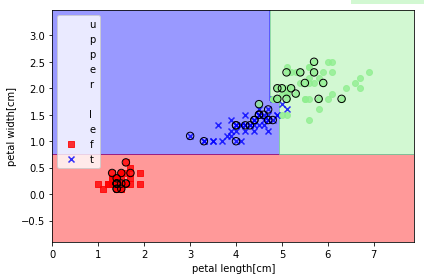

In [77]:
#エントロピーを指標とする決定木のインスタンスを生成
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
#決定木のモデリングをトレーニングデータに結合させる
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel("petal length[cm]")
plt.ylabel("petal width[cm]")
plt.legend("upper left")
plt.tight_layout()
plt.show()

In [78]:
!pip3 install pydotplus

    100% |████████████████████████████████| 286kB 1.2MB/s ta 0:00:01
  Stored in directory: /Users/hasegawatakashikana/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [98]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [99]:
dot_data =export_graphviz(tree,filled=True,rounded=True,class_names=["Setosa","Versicolor","Virginica"],
                          feature_names=["petal length","petal width"],out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")

True

In [90]:
def find_graphviz():
    #dot実行ファイルがあるPathを指定する
    return __find_executables("C:\Users\username\Anaconda3\Library\bin\graphviz")


    

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-90-ae7961ca470a>, line 3)

In [91]:
from sklearn.ensemble import RandomForestClassifier

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


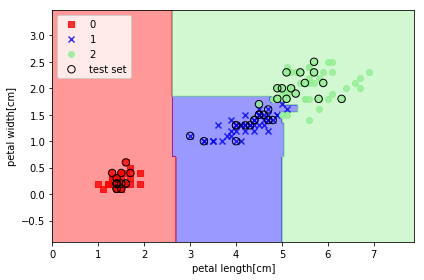

In [94]:
#エントロピーを指標とするランダムフォレストのインスタンスを生成
forest = RandomForestClassifier(criterion="gini",n_estimators=25,random_state=1,n_jobs=2)
#トレーニングデータにランダムフォレストのモデルを適合させる
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel("petal length[cm]")
plt.ylabel("petal width[cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

3.7 k近傍法

In [95]:
from sklearn.neighbors import KNeighborsClassifier

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


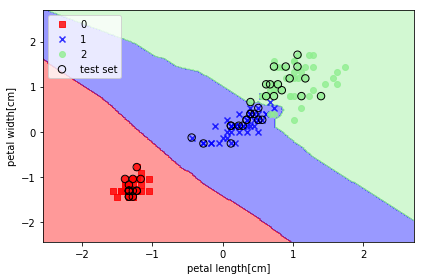

In [97]:
# k近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric="minkowski")
#トレーニングデータにk近傍法のモデルを適合させる
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel("petal length[cm]")
plt.ylabel("petal width[cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()